# 1. Importando **Bibliotecas**

In [1]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

     |████████████████████████████████| 6.3MB 30.5MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=6ffb37af523fb5c14eedfaae8c20463b4b807d813919ab6b9d4fcb7d9f7cfe9a
  Stored in directory: /tmp/pip-ephem-wheel-cache-3xt_dzi2/wheels/fe/a0/79/b73d4a0c535b421b88fc7b393936b371fabbfeaf979eca4050
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import seaborn as sns

# 2. Obtendo e tratando os dados

In [3]:
tickers = ['ABEV3.SA', 'ITSA4.SA', 'WEGE3.SA', 'USIM5.SA', 'VALE3.SA']

carteira = web.get_data_yahoo(tickers, period='5y', start='2015-02-19', end='2020-02-19')['Adj Close']

ibov = web.get_data_yahoo('^BVSP', period='5y', start='2015-02-19', end='2020-02-19')['Adj Close']

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
carteira

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA
Date,,,,,
2015-02-19,15.244149,5.208440,3.614706,16.832769,5.660742
2015-02-20,15.193977,5.218877,3.902348,17.228834,5.574976
2015-02-23,15.453203,5.255411,3.720175,16.467173,5.549243
2015-02-24,15.453203,5.302381,3.739351,16.787073,5.574976
2015-02-25,15.260873,5.323256,3.892760,16.863235,5.472709
...,...,...,...,...,...
2020-02-12,16.144161,12.655033,9.710294,47.800648,21.979425
2020-02-13,15.775706,12.465725,10.192855,46.962990,22.477610
2020-02-14,15.911450,12.304818,9.749685,45.936176,22.477610


In [5]:
ibov

Date
2015-02-19     51294.0
2015-02-20     51238.0
2015-02-23     51281.0
2015-02-24     51874.0
2015-02-25     51811.0
                ...   
2020-02-12    116674.0
2020-02-13    115662.0
2020-02-14    114381.0
2020-02-17    115309.0
2020-02-18    114977.0
Name: Adj Close, Length: 1237, dtype: float64

# 3. Resultados

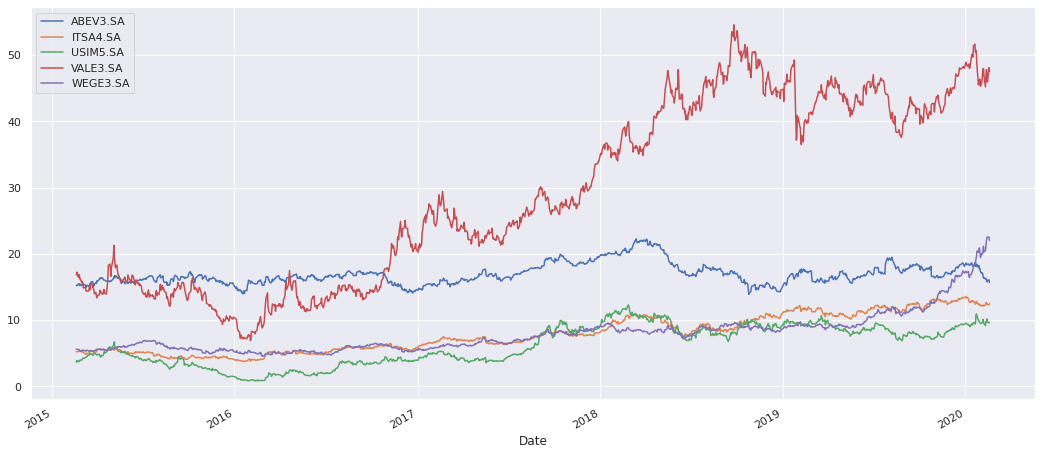

In [6]:
sns.set()
carteira.plot(figsize=(18,8))

In [8]:
# Simulando a Compra das Açoes
carteira_normalizada = (carteira / carteira.iloc[0])*10000
carteira_normalizada

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA
Date,,,,,
2015-02-19,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
2015-02-20,9967.087798,10020.038651,10795.756318,10235.293878,9848.490107
2015-02-23,10137.137200,10090.181253,10291.778196,9782.806523,9803.032253
2015-02-24,10137.137200,10180.361591,10344.828837,9972.852798,9848.490107
2015-02-25,10010.970526,10220.442555,10769.231327,10018.099268,9667.829570
...,...,...,...,...,...
2020-02-12,10590.398325,24297.164551,26863.304913,28397.375748,38827.818303
2020-02-13,10348.695802,23933.700336,28198.299155,27899.740505,39707.887066
2020-02-14,10437.742487,23624.765641,26972.280643,27289.731847,39707.887066


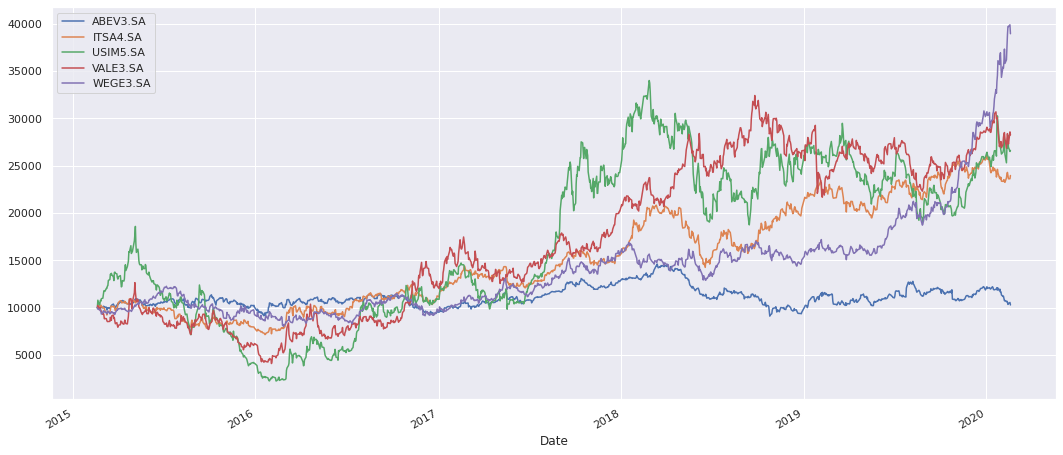

In [9]:
sns.set()
carteira_normalizada.plot(figsize=(18,8))

In [13]:
carteira_normalizada['saldo'] = carteira_normalizada.sum(axis=1)
carteira_normalizada

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,saldo
Date,,,,,,
2015-02-19,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,100000.000000
2015-02-20,9967.087798,10020.038651,10795.756318,10235.293878,9848.490107,101733.333503
2015-02-23,10137.137200,10090.181253,10291.778196,9782.806523,9803.032253,100209.870850
2015-02-24,10137.137200,10180.361591,10344.828837,9972.852798,9848.490107,100967.341066
2015-02-25,10010.970526,10220.442555,10769.231327,10018.099268,9667.829570,101373.146491
...,...,...,...,...,...,...
2020-02-12,10590.398325,24297.164551,26863.304913,28397.375748,38827.818303,257952.123680
2020-02-13,10348.695802,23933.700336,28198.299155,27899.740505,39707.887066,260176.645729
2020-02-14,10437.742487,23624.765641,26972.280643,27289.731847,39707.887066,256064.815367


In [14]:
ibov_normalizada = (ibov / ibov.iloc[0])*50000


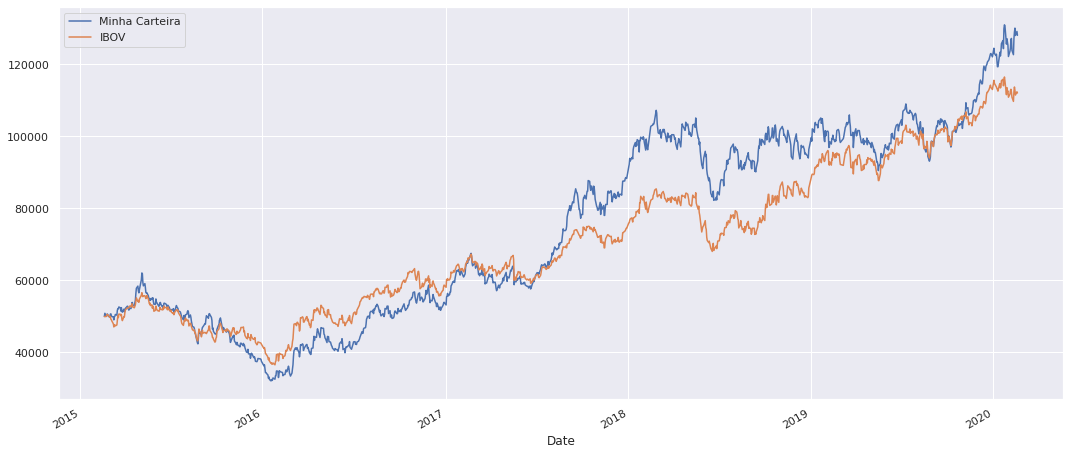

In [12]:
carteira_normalizada['saldo'].plot(figsize=(18,8), label='Minha Carteira')
ibov_normalizada.plot(label='IBOV')
plt.legend()